In [1]:
# 협업필터링, KNN을 써서 유사도가 높은 사람의 것만 필터링

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [29]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('./u.user', sep='|', names=u_cols, encoding='latin-1')
# users = users.set_index('user_id')
# users.head()

# u.itm 파일을 DataFrame으로 읽기
i_cols = ['movie_id', 'title', 'release date', 'video release date', 'IMDB URL', 
    'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 
    'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 
    'Romance', 'Sci-fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('./u.item', sep='|', names=i_cols, encoding='latin-1')
# movies = movies.set_index('movie_id')
# movies.head()

# u.data
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('./u.data', sep='\t', names=r_cols, encoding='latin-1')
# ratings = ratings.set_index('user_id')
# ratings.head()

# remove timestamp
ratings = ratings.drop('timestamp', axis=1)
# ratings.head()

# remove all except movie id and title
movies = movies[['movie_id', 'title']]
# movies.head()

In [30]:
X = ratings.copy() # deep copy
y = ratings['user_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [31]:
def RMSE(y_true, y_pred): # root mean square error
    return np.sqrt(np.mean((np.array(y_true) - np.array(y_pred))**2))

def score(model, neighbor_size=0):
    id_pairs = zip(X_test['user_id'], X_test['movie_id'])
    y_pred = np.array([model(user, movie, neighbor_size) for (user, movie) in id_pairs])
    y_true = np.array(X_test['rating'])
    return RMSE(y_true, y_pred)

rating_matrix = X_train.pivot(index='user_id', columns='movie_id', values='rating')
print(rating_matrix)

movie_id  1     2     3     4     5     6     7     8     9     10    ...  \
user_id                                                               ...   
1          5.0   NaN   4.0   3.0   3.0   5.0   4.0   NaN   5.0   3.0  ...   
2          4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5          NaN   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
939        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
940        NaN   NaN   NaN   2.0   NaN   NaN   4.0   NaN   3.0   NaN  ...   
941        5.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
942        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
943        NaN   5.0   NaN   NaN   NaN   NaN   NaN   NaN   3.0   NaN  ...   

In [32]:
# user의 id를 말한다
rating_matrix.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
           dtype='int64', name='user_id', length=943)

<AxesSubplot: xlabel='movie_id', ylabel='user_id'>

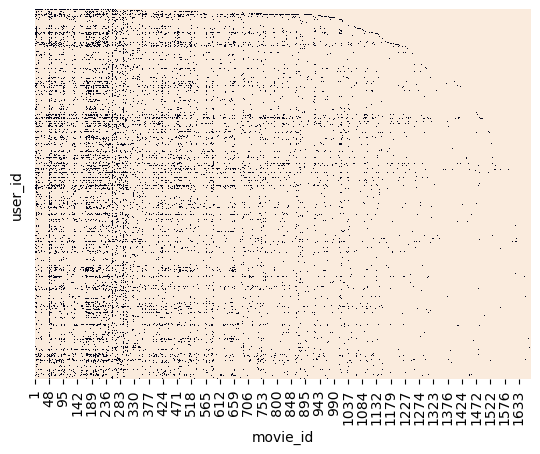

In [33]:
sns.heatmap(rating_matrix.isnull(), yticklabels=False, cbar=False)

In [34]:
# train set의 모든 가능한 사용자 pair의 cosine similarities를 계산
matrix_dummy = rating_matrix.copy().fillna(0)

In [35]:
matrix_dummy.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,1671,1672,1673,1674,1676,1677,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,4.0,3.0,3.0,5.0,4.0,0.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot: xlabel='movie_id', ylabel='user_id'>

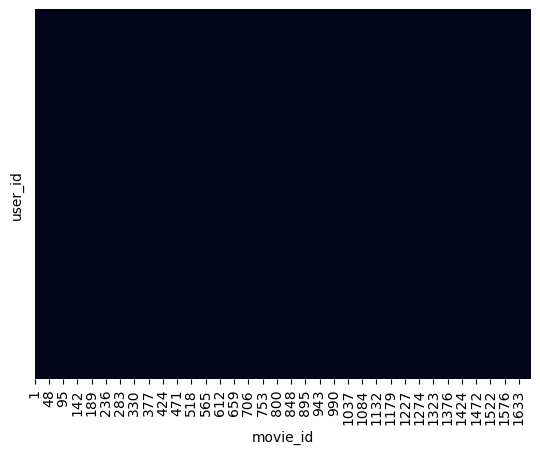

In [36]:
sns.heatmap(matrix_dummy.isnull(), yticklabels=False, cbar=False)

In [37]:
user_similarity = cosine_similarity(matrix_dummy, matrix_dummy)

In [38]:
user_similarity[0]

array([1.        , 0.11797229, 0.01144013, 0.03128557, 0.28613333,
       0.32749717, 0.329756  , 0.24587565, 0.05976613, 0.26021485,
       0.25596902, 0.24239548, 0.33506822, 0.25543743, 0.14629844,
       0.29070582, 0.20136735, 0.35007789, 0.08189806, 0.15455216,
       0.13087887, 0.3021698 , 0.30953283, 0.22022833, 0.24034828,
       0.15714619, 0.10912522, 0.19678655, 0.10780215, 0.12934132,
       0.11163508, 0.08149205, 0.03445382, 0.03836806, 0.00863957,
       0.02278472, 0.21374091, 0.1271814 , 0.04584534, 0.08721523,
       0.22630504, 0.24362007, 0.30976016, 0.35306112, 0.13320333,
       0.09792927, 0.0678138 , 0.13653674, 0.23696795, 0.08589748,
       0.19199623, 0.13370894, 0.15809144, 0.16760239, 0.15896083,
       0.29262294, 0.13215695, 0.27229522, 0.37379372, 0.28507369,
       0.04864039, 0.36552142, 0.20982606, 0.35544316, 0.24291096,
       0.11534272, 0.10047169, 0.11503352, 0.30333131, 0.303392  ,
       0.16833753, 0.30122556, 0.2356637 , 0.07413141, 0.16245

In [39]:
# user가 movie에 대한 선호도를 나타낸다
# 사람은 943명이고 영호는 1600개이다
# 한사람의 전체 영화에 대한 선호도는 1600개이며, 이에 대한 코사인 유사도는 943 * 943개이다

len(user_similarity[0])

943

In [40]:
user_similarity = pd.DataFrame(user_similarity, index=rating_matrix.index, columns=rating_matrix.index)

In [41]:
user_similarity.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.117972,0.011440,0.031286,0.286133,0.327497,0.329756,0.245876,0.059766,0.260215,...,0.271002,0.076104,0.205669,0.114758,0.120109,0.075250,0.251323,0.115437,0.143292,0.284052
2,0.117972,1.000000,0.045392,0.096434,0.058055,0.203559,0.064830,0.042329,0.203564,0.110915,...,0.107040,0.262830,0.260222,0.423563,0.230636,0.245020,0.129910,0.186812,0.112243,0.145270
3,0.011440,0.045392,1.000000,0.295269,0.000000,0.058823,0.042540,0.038995,0.057575,0.033934,...,0.000000,0.019031,0.114219,0.052276,0.081307,0.015935,0.148347,0.073336,0.171236,0.015673
4,0.031286,0.096434,0.295269,1.000000,0.000000,0.045252,0.050327,0.032655,0.000000,0.037963,...,0.000000,0.047312,0.050189,0.103972,0.116982,0.039616,0.099988,0.133702,0.101546,0.036368
5,0.286133,0.058055,0.000000,0.000000,1.000000,0.207099,0.302325,0.203642,0.034106,0.154948,...,0.266790,0.042275,0.055073,0.092901,0.124680,0.026549,0.224575,0.099555,0.151999,0.251454


In [42]:
# 모든 user에 대하여 rating 평균과 영화의 평점편차 계산
rating_mean = rating_matrix.mean(axis=1)

In [43]:
rating_mean.head()

user_id
1    3.686275
2    3.652174
3    2.658537
4    4.388889
5    3.045802
dtype: float64

In [44]:
# rating_matrix를 전치하여 movie_id를 인덱스로 하여 rating_mean을 빼주고 다시 전치全治
rating_bias = (rating_matrix.T - rating_mean).T

In [45]:
rating_bias.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,1671,1672,1673,1674,1676,1677,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.313725,NaN,0.313725,-0.686275,-0.686275,1.313725,0.313725,NaN,1.313725,-0.686275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.347826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,-0.045802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# 사용자별 공통 평가 수 계산
rating_binary1 = np.array((rating_matrix > 0).astype(float)) # row: user, col: movie

In [47]:
rating_binary1.shape

(943, 1637)

In [48]:
print(rating_binary1)

[[1. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [49]:
rating_binary2 = rating_binary1.T # row: movie, col: user

In [50]:
rating_binary2.shape

(1637, 943)

In [51]:
print(rating_binary2)

[[1. 1. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [52]:
counts = np.dot(rating_binary1, rating_binary2) # user x user

In [53]:
counts.shape

(943, 943)

In [54]:
print(counts)

[[204.  10.   2. ...   5.  16.  45.]
 [ 10.  46.   4. ...   6.   5.   9.]
 [  2.   4.  41. ...   3.   8.   1.]
 ...
 [  5.   6.   3. ...  17.   4.   4.]
 [ 16.   5.   8. ...   4.  59.  15.]
 [ 45.   9.   1. ...   4.  15. 126.]]


In [57]:
counts = pd.DataFrame(counts, index=rating_matrix.index, columns=rating_matrix.index)

In [58]:
SIG_LEVEL = 3
MIN_RATINGS = 2

In [59]:
def CF_knn_bias_sig(user_id, movie_id, neighbor_size=0):
    if movie_id in rating_bias:
        sim_scores = user_similarity[user_id]
        movie_ratings = rating_bias[movie_id]
        no_rating = movie_ratings.isnull()
        common_counts = counts[user_id]
        low_significance = common_counts < SIG_LEVEL
        none_rating_idx = movie_ratings[no_rating | low_significance].index
        movie_ratings = movie_ratings.drop(none_rating_idx)
        sim_scores = sim_scores.drop(none_rating_idx)
        
        # neighbor_size = 0
        if neighbor_size == 0:
            prediction = np.dot(sim_scores, movie_ratings) / sim_scores.sum()
            prediction = prediction + rating_mean[user_id]
        else: # neighbor_size > 0
            if len(sim_scores) > MIN_RATINGS:
                neighbor_size = min(neighbor_size, len(sim_scores))
                sim_scores = np.array(sim_scores)
                movie_ratings = np.array(movie_ratings)
                user_idx = np.argsort(sim_scores)
                sim_scores = sim_scores[user_idx][-neighbor_size:]
                movie_ratings = movie_ratings[user_idx][-neighbor_size:]
                prediction = np.dot(sim_scores, movie_ratings) / sim_scores.sum()
                prediction = prediction + rating_mean[user_id]
            else:
                prediction = rating_mean[user_id]
    else:
        prediction = rating_mean[user_id]
    return prediction

In [60]:
score(CF_knn_bias_sig, 30)

0.9479203476341737

In [ ]:
'''
이후로는 실행 안해봤음
''

In [50]:
# 최적의 neighbor size 구하기
# trainset으로 full matrix와 similarity 구하기

In [52]:
rating_matrix = X_train.pivot_table(values='rating', index='user_id', columns='movie_id')
matrix_dummy = rating_matrix.copy().fillna(0)
user_similarity = cosine_similarity(matrix_dummy, matrix_dummy)
user_similarity = pd.DataFrame(user_similarity, index=rating_matrix.index, columns=rating_matrix.index)

In [54]:
# 10단위로 먼저 찾는다
for neighbor_size in [10, 20, 30, 40, 50, 60]:
    print("Neighbor size = %d : RMSE = %.4f" % (neighbor_size, score(CF_knn, neighbor_size)))

Neighbor size = 10 : RMSE = 1.0319
Neighbor size = 20 : RMSE = 1.0157
Neighbor size = 30 : RMSE = 1.0126
Neighbor size = 40 : RMSE = 1.0122
Neighbor size = 50 : RMSE = 1.0122
Neighbor size = 60 : RMSE = 1.0127


In [55]:
# 1단위로 찾는다
for neighbor_size in range(40, 50):
    print("Neighbor size = %d : RMSE = %.4f" % (neighbor_size, score(CF_knn, neighbor_size)))

Neighbor size = 40 : RMSE = 1.0122
Neighbor size = 41 : RMSE = 1.0123
Neighbor size = 42 : RMSE = 1.0121
Neighbor size = 43 : RMSE = 1.0121
Neighbor size = 44 : RMSE = 1.0121
Neighbor size = 45 : RMSE = 1.0121
Neighbor size = 46 : RMSE = 1.0119
Neighbor size = 47 : RMSE = 1.0121
Neighbor size = 48 : RMSE = 1.0122
Neighbor size = 49 : RMSE = 1.0121


In [ ]:
# neighbor_size는 46으로 선택

In [24]:
# 주어진 사용자에 대하여 추천받기
# 전체 데이터로 fulll matrix와 cosine similarity 구하기
rating_matrix = ratings.pivot_table(values='rating', index='user_id', columns='movie_id')
rating_matrix.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
matrix_dummy = rating_matrix.copy().fillna(0)

<AxesSubplot: xlabel='movie_id', ylabel='user_id'>

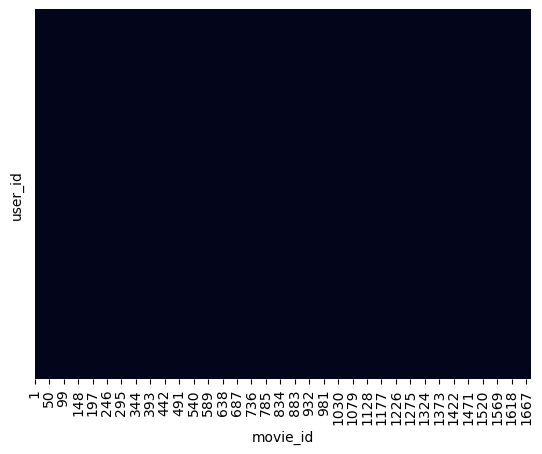

In [26]:
sns.heatmap(matrix_dummy.isnull(), yticklabels=False, cbar=False)

In [27]:
user_similarity = cosine_similarity(matrix_dummy, matrix_dummy)
user_similarity = pd.DataFrame(user_similarity, index=rating_matrix.index, columns=rating_matrix.index)

In [28]:
user_similarity.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.166931,0.047460,0.064358,0.378475,0.430239,0.440367,0.319072,0.078138,0.376544,...,0.369527,0.119482,0.274876,0.189705,0.197326,0.118095,0.314072,0.148617,0.179508,0.398175
2,0.166931,1.000000,0.110591,0.178121,0.072979,0.245843,0.107328,0.103344,0.161048,0.159862,...,0.156986,0.307942,0.358789,0.424046,0.319889,0.228583,0.226790,0.161485,0.172268,0.105798
3,0.047460,0.110591,1.000000,0.344151,0.021245,0.072415,0.066137,0.083060,0.061040,0.065151,...,0.031875,0.042753,0.163829,0.069038,0.124245,0.026271,0.161890,0.101243,0.133416,0.026556
4,0.064358,0.178121,0.344151,1.000000,0.031804,0.068044,0.091230,0.188060,0.101284,0.060859,...,0.052107,0.036784,0.133115,0.193471,0.146058,0.030138,0.196858,0.152041,0.170086,0.058752
5,0.378475,0.072979,0.021245,0.031804,1.000000,0.237286,0.373600,0.248930,0.056847,0.201427,...,0.338794,0.080580,0.094924,0.079779,0.148607,0.071459,0.239955,0.139595,0.152497,0.313941


In [47]:
def recommender(user, n_items=10, neighbor_size=20):
    predictions = []
    rated_index = rating_matrix.loc[user][rating_matrix.loc[user] > 0].index # 현재 사용자가 이미 본 영화들의 인덱스
    items = rating_matrix.loc[user].drop(rated_index)
    for item in items.index:
        predictions.append(CF_knn(user, item, neighbor_size))
    # print(predictions)
    recommendations = pd.Series(data=predictions, index=items.index, dtype=float)
    recommendations = recommendations.sort_values(ascending=False).iloc[:n_items]
    print(recommendations)
    recommended_items = movies.loc[recommendations.index]['title']
    return recommended_items

In [56]:
recommender(user=2, n_items=5, neighbor_size=46)

movie_id
1467    5.000000
1293    5.000000
119     4.564560
1449    4.542954
427     4.534596
dtype: float64


movie_id
1467                    Cure, The (1995)
1293    Ayn Rand: A Sense of Life (1997)
119                    Striptease (1996)
1449              Golden Earrings (1947)
427              Harold and Maude (1971)
Name: title, dtype: object